In [1]:
import torch
from custom_classes import Splatter, Splatter_Non_Sparse
import time
import numpy as np
import matplotlib.pyplot as plt


In [2]:


model_normal = torch.nn.Sequential(
    torch.nn.Conv2d(1,1,3)
)

model_splatter = Splatter(3,3)
normal_time = []
splatter_time = []
sparsity = np.linspace(0,1,50)
for i in sparsity:
    
    num_tests = 50
    input = (torch.rand(size=(100,1,24,24)) < i).float()

    t1 = 0.0
    for k in range(num_tests):
        t0 = time.perf_counter()
        output1 = model_normal(input)
        t1 += time.perf_counter()-t0
    normal_time.append(t1)

    t1 = 0.0
    for k in range(num_tests):
        t0 = time.perf_counter()
        output2 = model_splatter(input)
        t1 += time.perf_counter()-t0
    splatter_time.append(t1)

normal_time = np.array(normal_time)
splatter_time = np.array(splatter_time)


In [3]:
model_normal = torch.nn.Sequential(
    torch.nn.Conv2d(1,1,3)
)

model_splatter = Splatter(3,3)
normal_time_2 = []
splatter_time_2 = []
sparsity = np.linspace(0,1,50)
for i in sparsity:
    
    num_tests = 10
    input = (torch.rand(size=(100,1,266,266)) < i).float()

    t1 = 0.0
    t2 = 0.0
    for k in range(num_tests):
        t0 = time.perf_counter()
        output1 = model_normal(input)
        t1 += time.perf_counter()-t0
    
        t0 = time.perf_counter()
        output2 = model_splatter(input)
        t2 += time.perf_counter()-t0

        np.sum(np.arange(100000))
    normal_time_2.append(t1/num_tests)
    splatter_time_2.append(t2/num_tests)

normal_time_2 = np.array(normal_time_2)
splatter_time_2 = np.array(splatter_time_2)


In [4]:

# print("Normal Time:",normal_time)
# print("Splatter Time:", splatter_time)


Text(0.5, 1.0, 'Splatter vs Normal 2D Convolution Time')

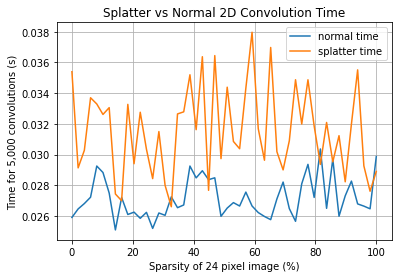

In [5]:
plt.subplot()
plt.plot((1-sparsity)*100, normal_time)
plt.plot((1-sparsity)*100, splatter_time)
plt.legend(("normal time", "splatter time"))
plt.grid()
plt.xlabel("Sparsity of 24 pixel image (%)")
plt.ylabel("Time for 5,000 convolutions (s)")
plt.title("Splatter vs Normal 2D Convolution Time")



Text(0, 0.5, 'Time (s)')

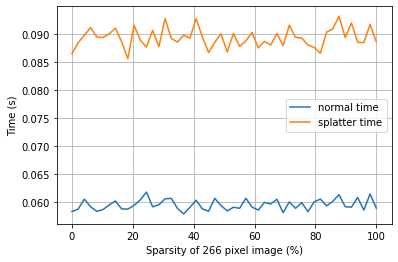

In [6]:
plt.subplot()
plt.plot((1-sparsity)*100, normal_time_2)
plt.plot((1-sparsity)*100, splatter_time_2)
plt.legend(("normal time", "splatter time"))
plt.grid()
plt.xlabel("Sparsity of 266 pixel image (%)")
plt.ylabel("Time (s)")